# Lab 1: Understanding Data through statistical and visualization techniques

## Data:

Data can be defined as the information, facts or statistics that are collected and used for reference, analysis or computation. Data can be images, text, numbers, etc. It can be raw, unorganized facts that require processing or can be structured information that can be used to make decisions, create models or generate insights.


##  Exploratory Data Analysis:

Exploratory Data Analysis (EDA) is the process of analyzing and summarizing datasets to discover patterns, spot anamolies, test hypothesis and check assumptions. It often involves:
- **Descriptive Statistics**: Mean, Median, Standard Deviation, etc.
- **Data Visualization**: Histograms, Box Plots, Scatter Plots, etc.
- **Correlation Analysis**: Pearson Correlation, Spearman Correlation, etc.
- **Missing Data Hnadling**: Identifying and addressing missing or inconsistent data.

##  Importance Of EDA:

- **Understanding Data**: It helps grasp the underlying structure, patterns and distributions.
- **Detecting Anomalies**: It helps identify missing data, outliers and inconsistencies.
- **Feature Selection**: It guides the selection of important variables for modeling.
- **Validating Assumptions**: It helps validate the underlying assumptions of the data.
- **Informing Model Choice**: It provides insights for selecting the right algorithms and techniques.

## PIIMA dataset explanation:

The **PIIMA (Pima Indian Diabetes) Dataset** is a well-known dataset used for binary classification tasks, particularly in predicting whether an individual has diabetes. It originates from the National Institute of Diabetes and Digestive and Kidney Diseases and contains medical data from a population of Pima Indian women.

### Key Features:
- **767 instances**: Each representing a patient.
- **8 Features**:
  1. **Pregnancies**: Number of times pregnant.
  2. **Glucose**: Plasma glucose concentration.
  3. **Blood Pressure**: Diastolic blood pressure (mm Hg).
  4. **Skin Thickness**: Triceps skinfold thickness (mm).
  5. **Insulin**: 2-hour serum insulin (mu U/ml).
  6. **BMI**: Body mass index (weight in kg/(height in m)^2).
  7. **Diabetes Pedigree Function**: A function representing diabetes genetic history.
  8. **Age**: In years.

- **Target Variable**:
  - **Outcome**: Binary (1 for diabetes, 0 for no diabetes).

### Use:
The dataset is commonly used for machine learning classification tasks, model evaluation, and medical research to predict diabetes based on the given health indicators.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
DATASET_PATH = "dataset/pima_diabetes.csv"

In [3]:
col_names = [
    'pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi',
    'pedigree', 'age', 'Diabetic'
]

# load dataset and attach corresponding label to each column of the raw data
dbts_ds = pd.read_csv(DATASET_PATH, header=0, names=col_names)
dbts_ds.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


#### Check dimensions (number of rows and columns in ths dataset)

In [4]:
dbts_ds.shape

(767, 9)

### Determine how many rows are related to 
- diabetic (1) class
- non diabetic (0) class

in the total 767 rows of data

In [5]:
dbts_ds.groupby('Diabetic').size()

Diabetic
0    500
1    267
dtype: int64

#### View statistical details about the data

In [6]:
dbts_ds.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Transpose this table and view more easily

In [7]:
dbts_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnant,767.0,3.842243,3.370877,0.000,1.0000,3.000,6.000,17.00
glucose,767.0,120.859192,31.978468,0.000,99.0000,117.000,140.000,199.00
bp,767.0,69.101695,19.368155,0.000,62.0000,72.000,80.000,122.00
skin,767.0,20.517601,15.954059,0.000,0.0000,23.000,32.000,99.00
insulin,767.0,79.903520,115.283105,0.000,0.0000,32.000,127.500,846.00
bmi,767.0,31.990482,7.889091,0.000,27.3000,32.000,36.600,67.10
pedigree,767.0,0.471674,0.331497,0.078,0.2435,0.371,0.625,2.42
age,767.0,33.219035,11.752296,21.000,24.0000,29.000,41.000,81.00
Diabetic,767.0,0.348110,0.476682,0.000,0.0000,0.000,1.000,1.00


## Exploratory Data Analysis (EDA)

A preliminary examination of the dataset to better understand its patterns and properties through visualization.

#### Histogram

Here we look at the distribution of each attribute by discretizing the continuous values into buckets and  count the frequency  in each bucket as histograms.

> Histogram is formed by couting the frequency of each  values in the attribute and then plotting it as bargraph.

This lets us note interesting properties of the attribute distributions such as the possible normal distribution of attributes  associated with the features of the dataset or skewness of the data feature.

array([[<Axes: title={'center': 'pregnant'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'bp'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'pedigree'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Diabetic'}>]], dtype=object)

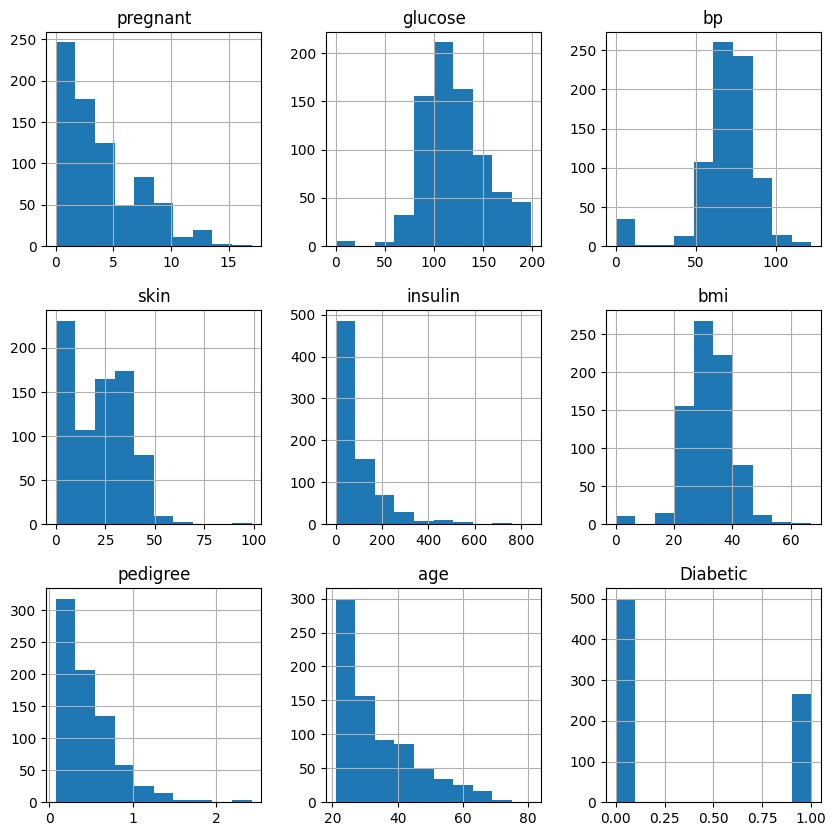

In [8]:
dbts_ds.hist(figsize=(10, 10))

#### Histogram Data Interpretation of each attributes above

Each picture above is a histogram  that shows the distribution of  each feature or attibute. Each figure represents a univariate distribution. i.e. involving only one variable or feature.

### <font color = green> Certain insights from the histogram plot </font>
1. We have identified whether a data is normally distributed or skewed, i.e. "glucose" as normally distributed while "insulin" as right skewed.
2. Once we indeitfy the type of ditribution we can apply specific approach for missing values based on data distribution, i.e. we may replace the missing value of  "glucose" as mean and missing value of  "insulin" as median.
3. Most of the learning models are based on Normal/Gaussian distribution (the bell shaped curve). So if any data feature is skewed we can transform it into normal distribution then impute the missing values and then feed the learning model.Because such models make good prediciton if data are distributed normally.
4. Algorithms are biased when the data distritbuion is skewed i.e. if the learning algorithm(model) gets trained on the above insulin distribution then the model gives more accurate result on people with insulin level less than 250 but gives incorrect prediction  on people with insulin level grater then 350

#### Check the skewness degree of each atribute.

- Values near zero are less skewed as compared to values away from it. 
- Distributions that have skewness value less than -1 or greater than +1 are skewed.

Also we can check the skew value of each attribute in the histogram and we can make a lot of sense by simply seeing the skewnesss of each attibute.

In [9]:
skew_attrib_val = dbts_ds.skew()
print(skew_attrib_val)

pregnant    0.903976
glucose     0.176412
bp         -1.841911
skin        0.112058
insulin     2.270630
bmi        -0.427950
pedigree    1.921190
age         1.135165
Diabetic    0.638949
dtype: float64


#### Data Interpretation of above result

From above skew value, we found that glucose, pregnancy are normally distributed while features like bp, insulin, pedigree etc are skewed.

#### Another Insight from histogram data

The imbalanced class in the classification problem

#### Below figure shows there's lot more observations for one class than another and may need special handling in the data preparation

To know such imbalance

- Either use a count function or visulaize through a histogram   
- below figure shows a lot more non-diabetic observations than diabetic which needs special handling.

Diabetic
0    500
1    267
dtype: int64


Diabetic
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: glucose, dtype: object

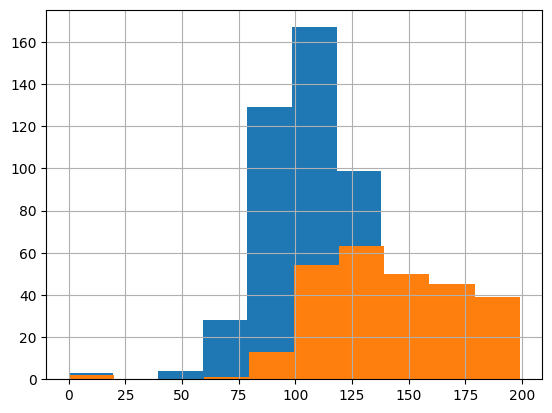

In [10]:
output_grp = dbts_ds.groupby('Diabetic').size()
print(output_grp)

dbts_ds.groupby('Diabetic').glucose.hist(alpha=1)

The above figure shows that there are a lot more non diabetic patient (500) than diabetes patients (267) in the total 767 observations.

> Training model on such imbalanced classes will likely predict the majority class (non diabetic) and hence the model will have low accuracy predicting diabetic population.

## Box Plots

Visualize data distritbution's median as thick line within the box, interquartile range with 25th percentile as left most boundary and 75th percentile as right most boundary. Data outisde of these interquartile range are considered outliers.

From the diagram below Insulin has the highest outliers while glucose has the lowest

<Axes: >

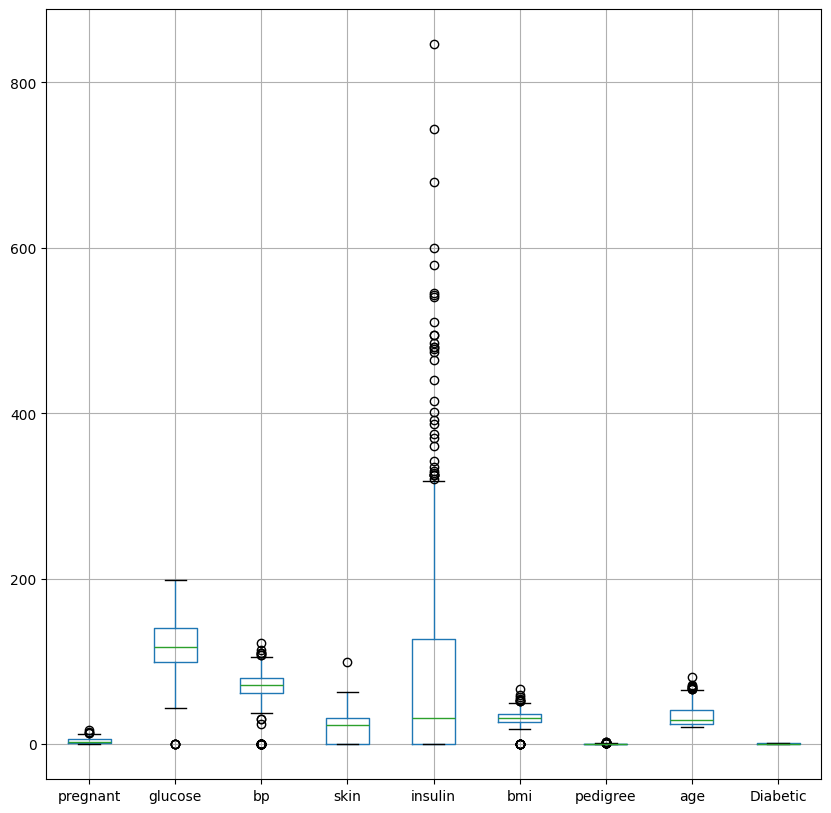

In [11]:
dbts_ds.boxplot(figsize=(10, 10))

## Heatmap Plot

Identifying correlation between two attributes, values nearer to +1 represents stronger linear relationship between two variables while values nearer to  -1 represents  inverse relation.

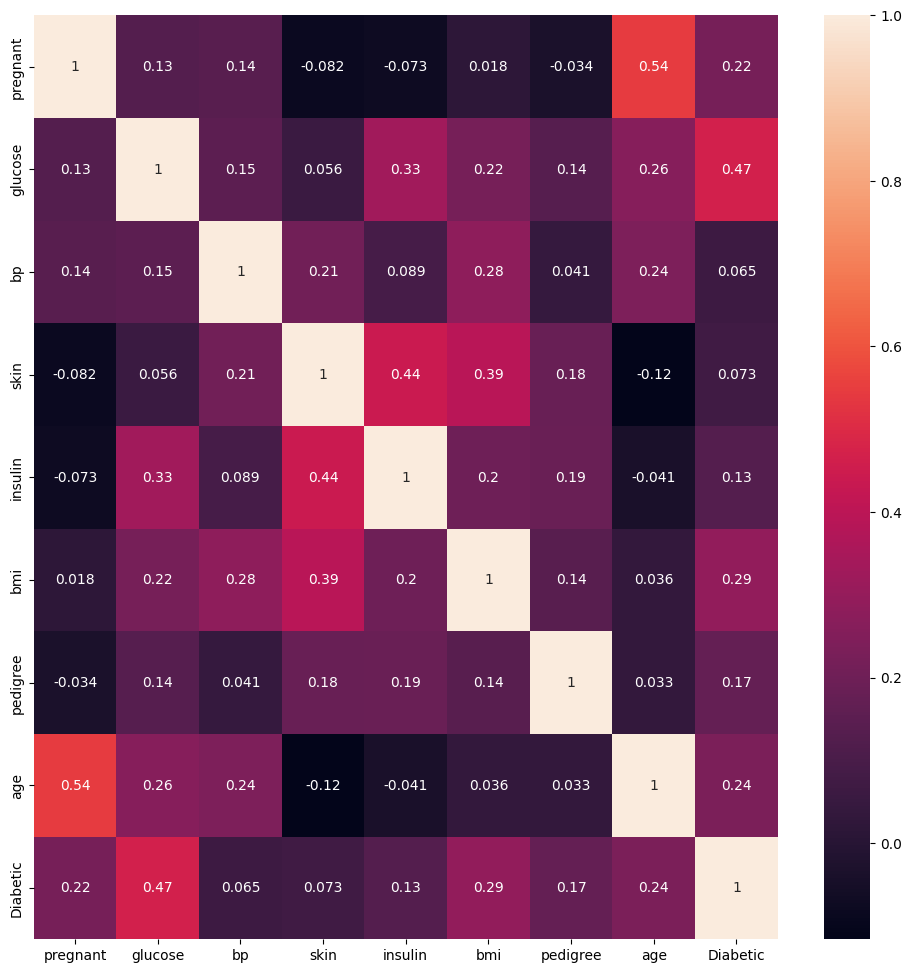

In [12]:
plt.figure(figsize=(12, 12))
dbts_ds = sns.heatmap(dbts_ds.corr(), annot=True)